<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

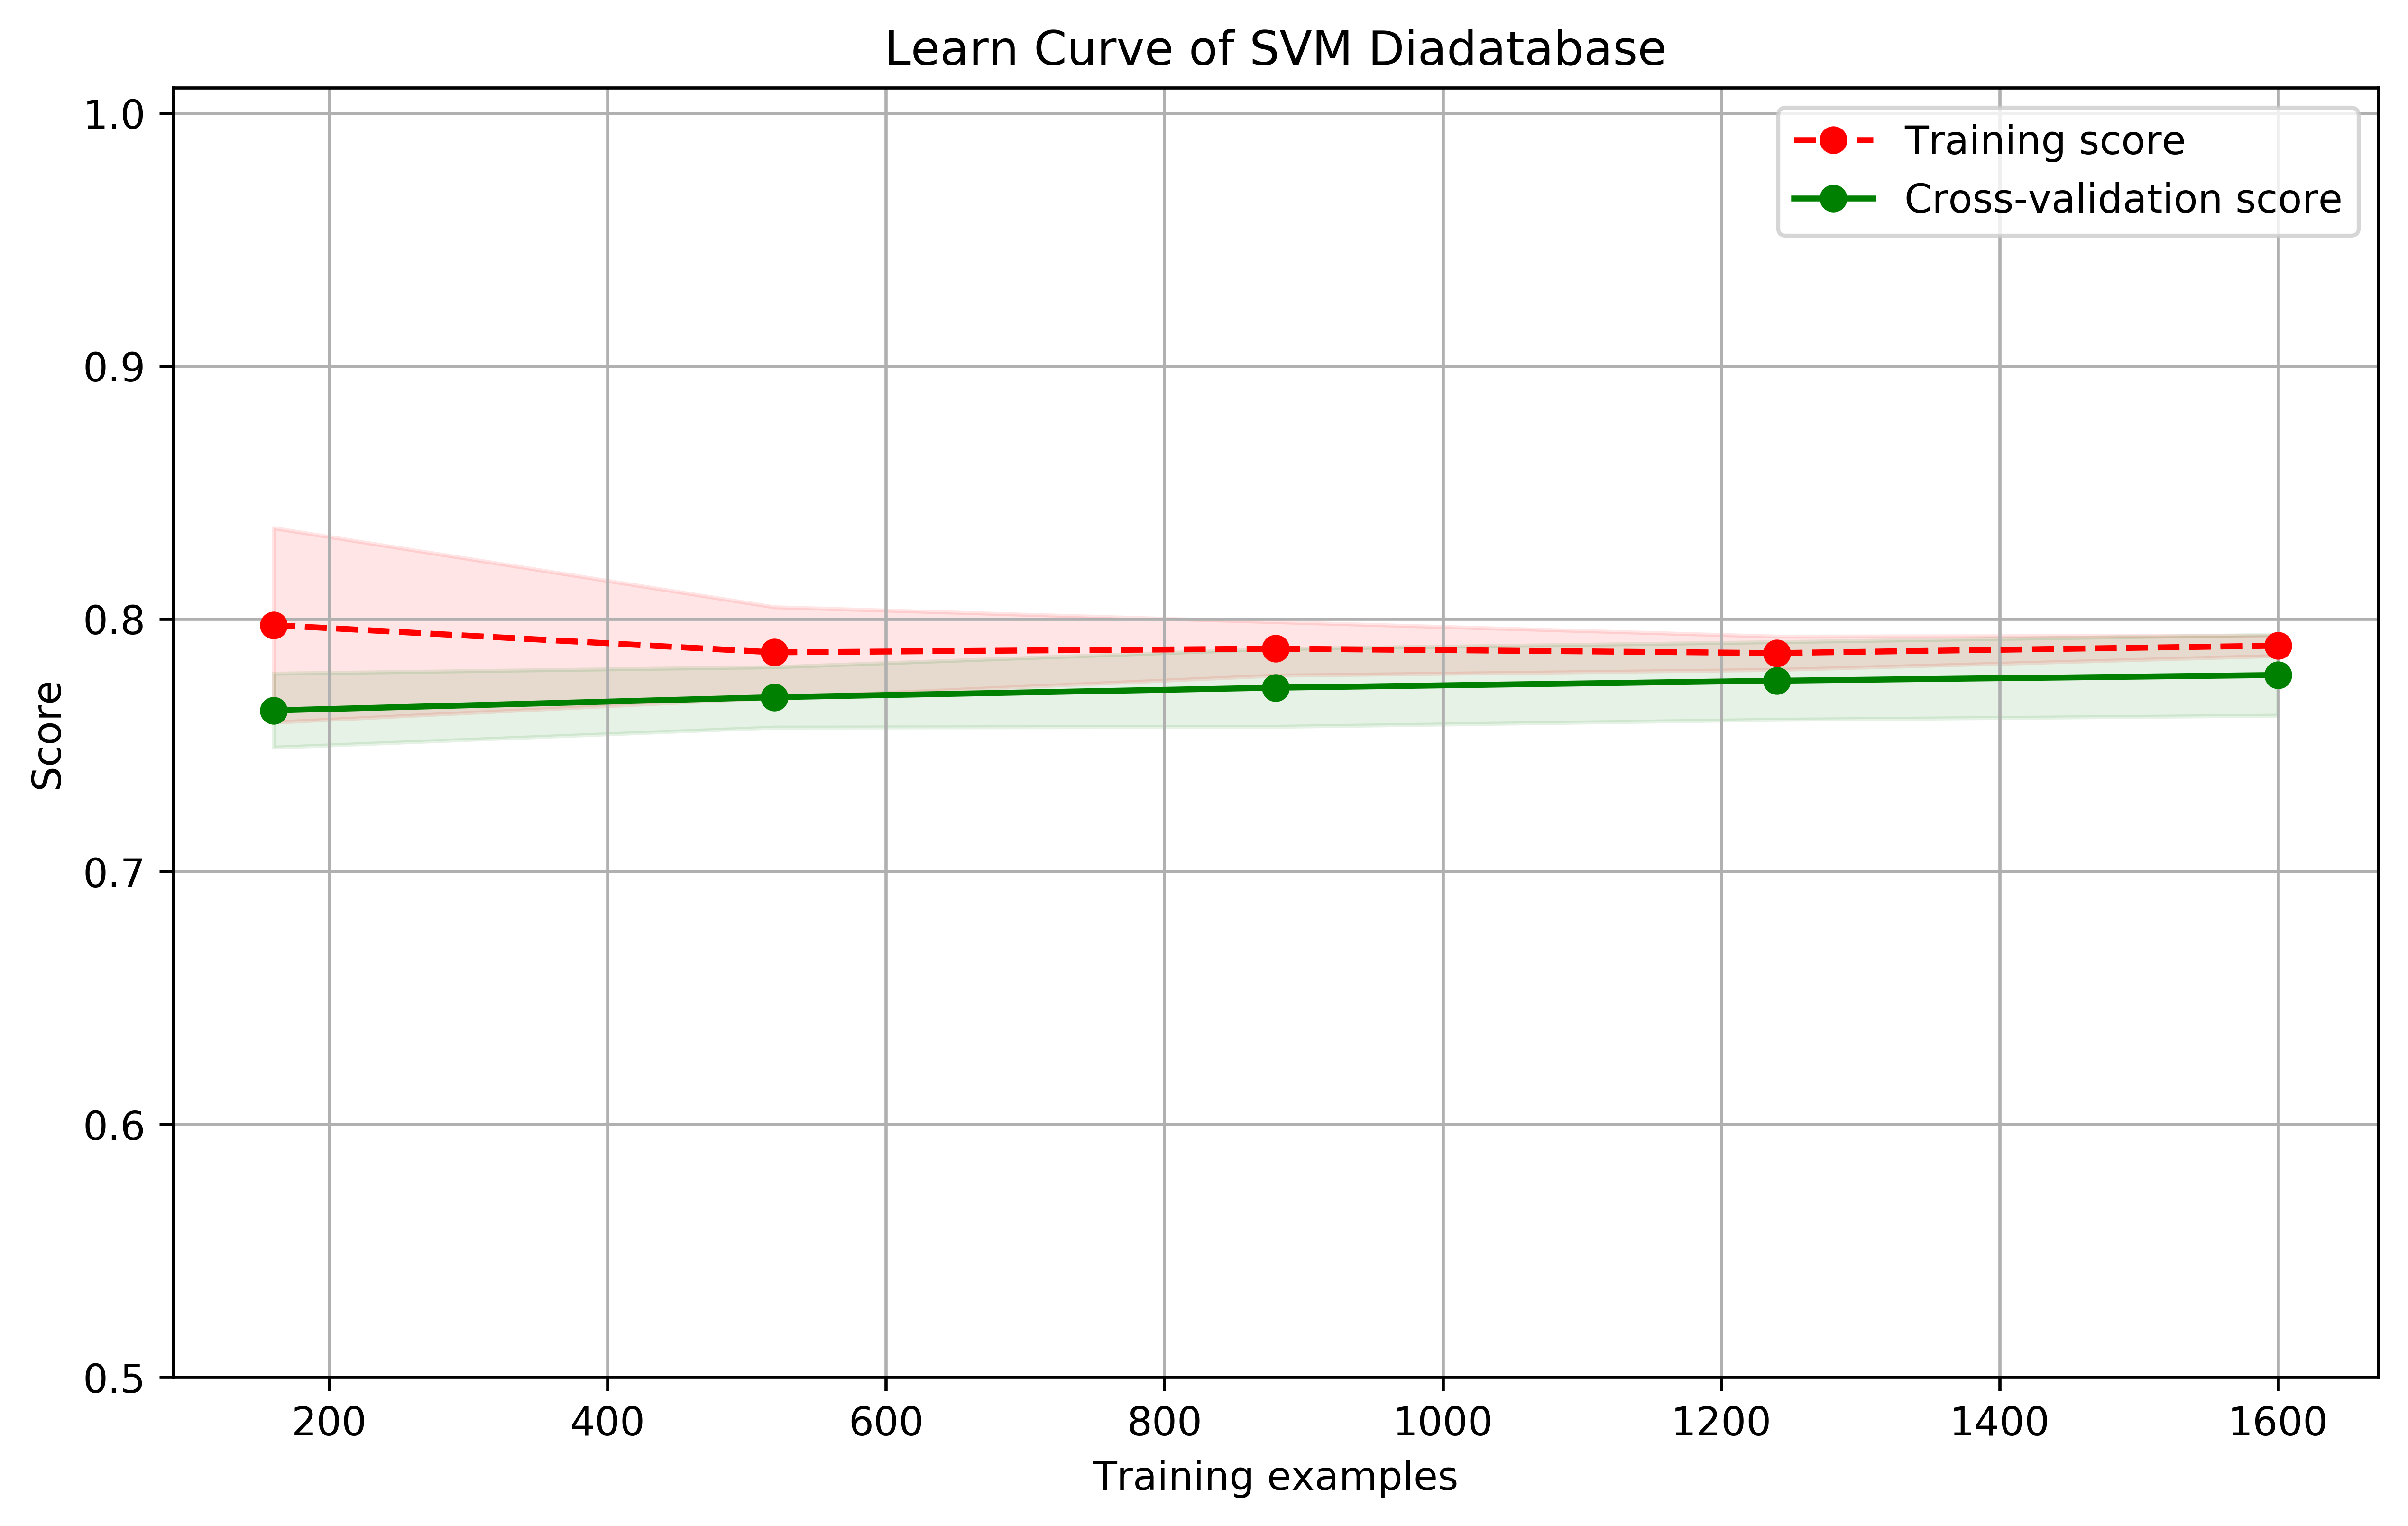

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import numpy as np
#载入数据
data = pd.read_csv("../8_train.csv")
#拆分训练集与测试集
X = data.iloc[0:2000,:-1]
Y = data.iloc[0:2000,-1]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)
#使用针对大数据样本的高斯核（效果肯定不好），使用GridSearchCV来搜寻最优参数
gammas= np.linspace(0 , 0.1 , 30) 
param_grid = {'gamma': gammas}
clf = GridSearchCV (SVC(), param_grid , cv=5)
clf.fit (X , Y )
best_gamma = clf.best_params_['gamma']
#画出学习曲线
from sklearn.model_selection import ShuffleSplit
from commons.utils import plot_learning_curve
import matplotlib.pyplot as plt
svc = SVC(C=1.0,kernel='rbf',gamma=best_gamma)
#knn = KNeighborsClassifier(n_neighbors=2)
cv = ShuffleSplit(n_splits=10,test_size=.2,random_state=42)
plt.figure(figsize=(10,6),dpi=600)
plot_learning_curve(plt,
                   svc,
                    "Learn Curve of SVM Diadatabase",
                    X,Y,
                    ylim=(.5,1.01),
                    cv=cv)

In [14]:
#判断准确度
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=10)
print("name : SVM score: {}".format(cross_val_score(svc,X,Y,cv=kfold).mean()))

name : SVM score: 0.7785


In [16]:
#使用测试集
df = pd.read_csv("../8_test.csv")
x_test = df.iloc[:,:-1]
y_test = df.iloc[:,-1]
svc.fit(X,Y)
svc.score(x_test,y_test)

0.7583875753804921

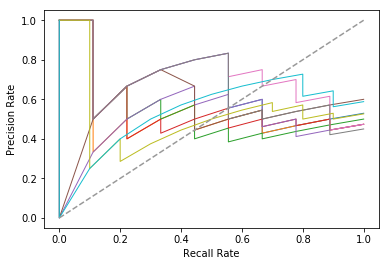

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm,datasets,linear_model
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve,auc,precision_recall_curve
from sklearn.model_selection import KFold,StratifiedKFold
 
# iris = datasets.load_iris()
# X = iris.data
# y = iris.target
# X,y = X[y!=2],y[y!=2]													 # 去掉了label为2，label只能二分才可以
data = pd.read_csv("../model_woe.csv")
#拆分训练集与测试集
X = data.iloc[0:200,:-1]
Y = data.iloc[0:200,-1]
n_samples,n_features = X.shape
random_state = np.random.RandomState(0)
X = np.c_[X,random_state.randn(n_samples,200*n_features)]
kfold = StratifiedKFold(n_splits=10)										 # 使用5折交叉验证，并且画ROC曲线
cv = kfold.split(X,Y)
classifier = svm.SVC(kernel="linear",probability=True,random_state=random_state) 
for i,(train,test) in enumerate(cv):									 # 通过训练数据，使用svm线性核建立模型，并对测试集进行测试，求出预测得分
	probas_ = classifier.fit(X[train],Y[train]).predict_proba(X[test])
	precision,recall,thresholds = precision_recall_curve(Y[test],probas_[:,1])# 最重要的函数：通过precision_recall_curve()函数，求出recall，precision，以及阈值
	plt.plot(recall,precision,lw=1)
plt.plot([0,1],[0,1],'--',color=(0.6,0.6,0.6),label="Luck")				 # 画对角线		 
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel("Recall Rate")
plt.ylabel("Precision Rate")
plt.savefig("svm ROC")